In [45]:
from sympy import *
from sympy.physics.continuum_mechanics.beam import Beam

In [46]:
x, y, z = symbols('x y z')
init_printing(use_unicode=True, wrap_line=False)

E, I = symbols('E, I')
b = Beam(9, E, I)

In [47]:
#Apply loads
# -point load of 12 kN downward at x = 9 and of the -1 order or,  -12<x-9>^-1
b.apply_load(-12, 9, -1)

# -Moment applied at x = 5 or,  5<x-5>^-2
b.apply_load(50, 5, -2)

# -Distributed load from x= 0 to x=5 and of -8, or  -8<x-0>^0  8<x-5>^0
b.apply_load(-8, 0, 0, end=5)

#Boundary conditions
# -At 0,0 the deflection will be 0
b.bc_deflection.append((0, 0))

# -At 0, 0 the slope will be 0
b.bc_slope.append((0, 0))

In [48]:
b.load

In [49]:
R, M = symbols('R, M')
b.apply_load(R, 0, -1)
b.apply_load(M, 0, -2)
b.load


In [50]:
b.solve_for_reaction_loads(R, M)
b.reaction_loads

In [51]:
b.load

In [52]:
b.shear_force()

In [53]:
b.bending_moment()

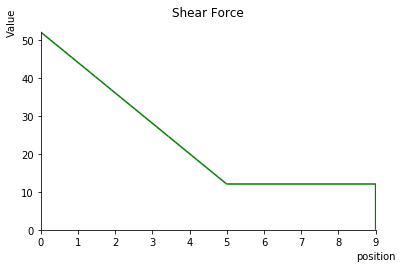

In [54]:
b.plot_shear_force()

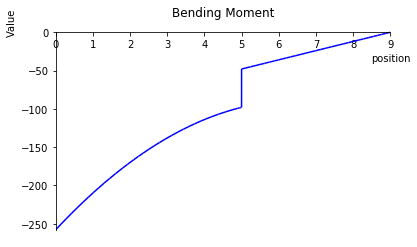

In [55]:
b.plot_bending_moment()

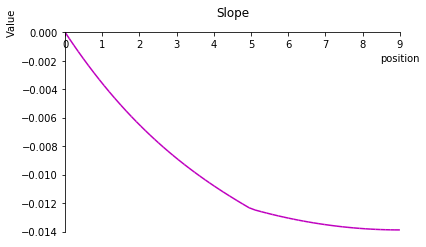

In [57]:
b.plot_slope(subs={E: 20E9, I: 3.25E-6})

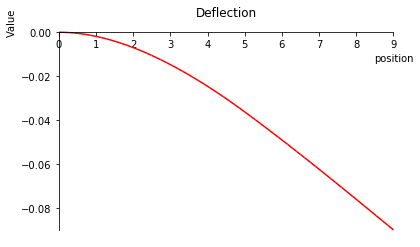

In [58]:
b.plot_deflection(subs={E: 20E9, I: 3.25E-6})

In [61]:
b.bending_moment()

In [62]:
expr = b.bending_moment()
expr.__class__

sympy.core.add.Add

In [70]:
f = lambdify(x, expr, "sympy")
f(5)